In [106]:
import pandas as pd
import numpy as np

## wine数据集

In [107]:
df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

In [108]:
df_wine.columns = ["Class label", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flacanoide",
                   "Nonfiavanoid phenols", "Proanthocyanins", "Color intensity", 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flacanoide,Nonfiavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [109]:
# 查看葡萄酒的类别,一共有三种
print("Class labels", np.unique(df_wine['Class label']))

Class labels [1 2 3]


### 分割数据集

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
# 将数据分为特征集(葡萄酒的特征)和结果集(葡萄酒的种类)
x, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [112]:
# 将数据分为训练集(70%)合测试集(30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

在分割数据集时，如果确定训练集和测试集的大小没有通用的做法，一般我们选择60:40, 70:30或者80:20。对于大数据集，90:10甚至 99:1也是比较常见的。还要注意的是，通过本地验证得到最优模型和参数时，还要在整个数据集(训练集+验证集+测试集)上训练一次，得到最终的模型。

### 统一特征值选取范围

#### 数据归一化

In [113]:
from sklearn.preprocessing import MinMaxScaler

In [114]:
mms = MinMaxScaler()

In [115]:
x_train_norm = mms.fit_transform(x_train)
# 只需要fit一次,以保证使用相同的标准镜像特征缩放
x_test_norm = mms.transform(x_test)

#### 数据标准化

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
stdsc = StandardScaler()

In [118]:
x_train_std = stdsc.fit_transform(x_train)

In [119]:
# StandardScaler只需要使用训练fit一次,以保证使用相同的标准镜像特征缩放
x_test_std = stdsc.transform(x_test)

#### L1正则化逻辑蒂斯回归应用到标准化后的wine数据集

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [122]:
lr = LogisticRegression(penalty='l1', C=0.1)

In [123]:
lr.fit(x_train_std, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [124]:
print('Training accuracy', lr.score(x_train_std, y_train))

Training accuracy 0.9838709677419355


In [125]:
print('Test accuracy', lr.score(x_test_std, y_test))

Test accuracy 0.9814814814814815


模型在训练集合测试集上的准确率说明了没有过拟合,我们调用lr.intercept_(截距项)属性,只返回三个值

In [126]:
lr.intercept_

array([-0.38375504, -0.15813773, -0.70039146])

In [127]:
# 回归系数(斜率)
lr.coef_

array([[ 0.28002888,  0.        ,  0.        , -0.02781626,  0.        ,
         0.        ,  0.71002227,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23674017],
       [-0.64375589, -0.06894988, -0.05717211,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92721081,
         0.05982638,  0.        , -0.37098934],
       [ 0.        ,  0.06138865,  0.        ,  0.        ,  0.        ,
         0.        , -0.63686388,  0.        ,  0.        ,  0.49845027,
        -0.35816455, -0.57049949,  0.        ]])

上面可以看出权重项中有很多0值,说明L1正则可以作为特征选择的一种手段,得到的模型具有鲁棒性(控制系统在一定（结构，大小）的参数摄动下，维持其它某些性能的特性)

最后我们画出正则路径,即不同正则威力下的不同特征的权重参数

In [128]:
import matplotlib.pyplot as plt

In [129]:
fig = plt.figure()

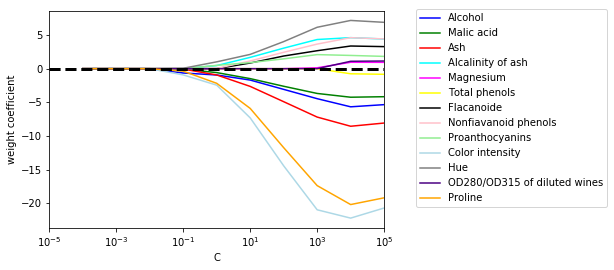

In [130]:
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue',
         'gray', 'indigo', 'orange']
weights, params = [], []

for c in np.arange(-4, 6, dtype=float):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr.fit(x_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column+1], color=color)
    
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.xlabel('C')
plt.ylabel('weight coefficient')
plt.xscale('log')
plt.legend('upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

#### 实现评价函数(SBS)

In [131]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [132]:
class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    
    def fit(self, x, y):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=self.test_size, random_state=self.random_state)
        dim = x_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(x_train, y_train, x_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim-1):
                socre = self._calc_score(x_train, y_train, x_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self, X):
        return X[:, self.scores_[-1]]
    
    def _calc_score(self, x_train, y_train, x_test, y_test, indices):
        self.estimator.fit(x_train[:, indices], y_train)
        y_pred = self.estimator.predict(x_test[:, indices])
        socre = self.scoring(y_test, y_pred)
        return socre
    

#### 使用knn作为estimator来运行SBS算法

In [133]:
from sklearn.neighbors import KNeighborsClassifier

In [134]:
import matplotlib.pyplot as plt

In [135]:
knn = KNeighborsClassifier(n_neighbors=2)

In [136]:
sbs = SBS(knn, k_features=1)

In [137]:
sbs.fit(x_train_std, y_train)

In [142]:
# 画出每个最优特征自己在验证集上分类的准确率
k_feat = [len(k) for k in sbs.subsets_]

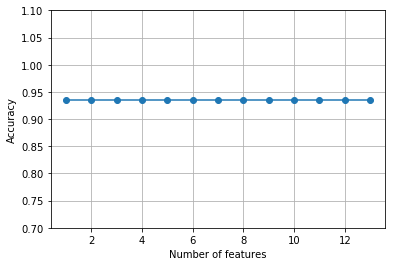

In [139]:
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

### 使用随机森林评估特征重要性

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

In [145]:
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [146]:
importances = forest.feature_importances_

In [147]:
indices = np.argsort(importances)[::-1]

In [149]:
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[f], importances[indices[f]]))

 1) Alcohol                        0.182483
 2) Malic acid                     0.158610
 3) Ash                            0.150948
 4) Alcalinity of ash              0.131987
 5) Magnesium                      0.106589
 6) Total phenols                  0.078243
 7) Flacanoide                     0.060718
 8) Nonfiavanoid phenols           0.032033
 9) Proanthocyanins                0.025400
10) Color intensity                0.022351
11) Hue                            0.022078
12) OD280/OD315 of diluted wines   0.014645
13) Proline                        0.013916


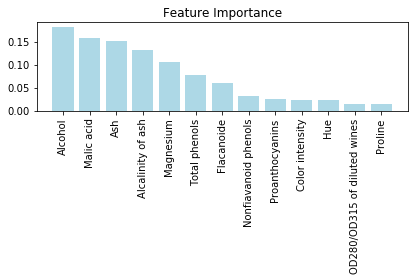

(124, 13)

In [160]:
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]),
       importances[indices],
       color='lightblue',
       align='center')
# np.shape返回矩阵的行列数,np.shape[1]表示返回矩阵
plt.xticks(range(x_train.shape[1]),
         feat_labels, rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.tight_layout() # tight_layout会自动调整子图参数，使之填充整个图像区域
plt.show()